In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import re


In [127]:
df = pd.read_csv('googleplaystore.csv')

In [128]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7996,FANDOM: Arrow and The Flash,FAMILY,4.5,3935,9.5M,"100,000+",Free,0,Mature 17+,Entertainment,"June 7, 2018",2.9.8,4.4 and up


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


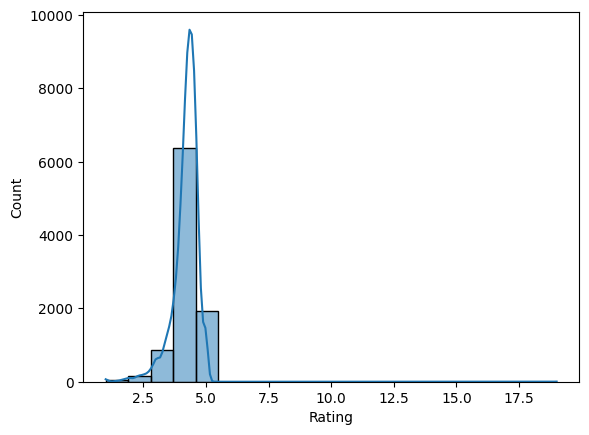

In [130]:
sns.histplot(data=df, x='Rating', bins=20, kde=True)
plt.show()

In [131]:
df["Rating"] = df["Rating"].clip(0, 5)

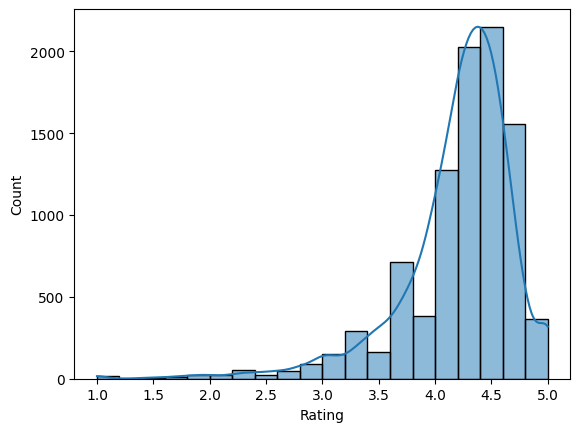

In [132]:
sns.histplot(data=df, x='Rating', bins=20, kde=True)
plt.show()

In [133]:
df['Rating'].isnull().sum()

np.int64(1474)

In [134]:
# pd.value_counts(df["Category"])

# df["Category"].nunique()

pd.unique(df["Category"])

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

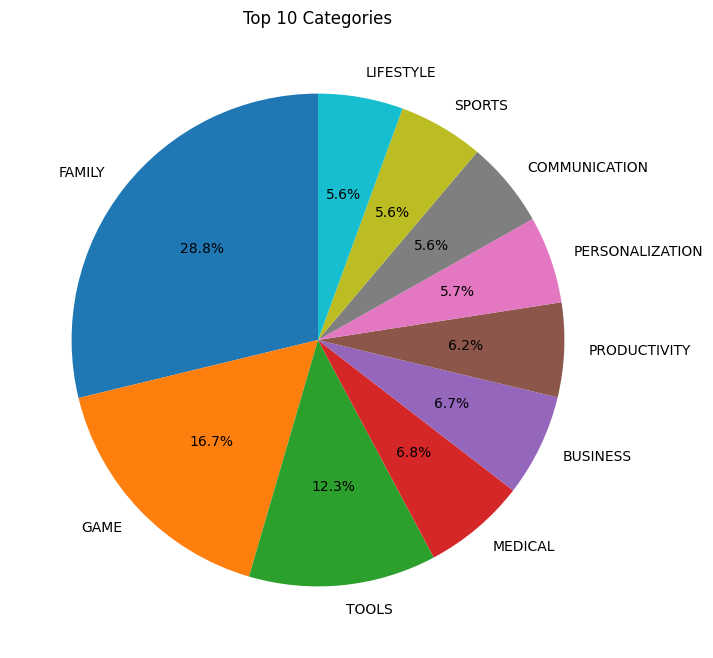

In [135]:
category_counts = df["Category"].value_counts()

# plt.figure(figsize=(10,10))
# plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
# plt.title("Distribution of Apps by Category")
# plt.show()

top10 = category_counts.head(10)

plt.figure(figsize=(8,8))
plt.pie(top10, labels=top10.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 10 Categories")
plt.show()

In [136]:
df[df["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,5.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [137]:
df.loc[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame", "Category"] = "PHOTOGRAPHY"
df.loc[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame", "Rating"] = 1.9

df[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [138]:
df.duplicated().sum()

np.int64(483)

In [139]:
duplicates = df["App"].value_counts()
duplicates[duplicates > 1].sum()

np.int64(1979)

In [140]:
df = df.sort_values("Reviews", ascending=False).drop_duplicates(subset=["App"], keep="first")


In [141]:
df['Size'].value_counts()

Size
Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
                      ... 
73k                      1
874k                     1
980k                     1
91k                      1
784k                     1
Name: count, Length: 462, dtype: int64

In [142]:
def size_to_mb(size):
    if size == "Varies with device":
        return np.nan
    elif isinstance(size, str):
        size = size.strip()
        if size.endswith("M"):
            return float(size[:-1])
        elif size.endswith("k"):
            return float(size[:-1]) / 1024
    return np.nan

df["Size_MB"] = df["Size"].apply(size_to_mb)

In [143]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2203
4.0.3 and up          1394
4.0 and up            1285
Varies with device     990
4.4 and up             818
2.3 and up             617
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             230
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [144]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    1055
1.0                    798
1.1                    260
1.2                    176
2.0                    149
                      ... 
1.98                     1
13.3                     1
v5.4.3                   1
3.1 Release b2           1
1.2.0.200                1
Name: count, Length: 2819, dtype: int64

In [145]:
def clean_ver(x):
    if x == "Varies with device" or pd.isna(x):
        return np.nan
    match = re.match(r"(\d+(\.\d+)?)", x)
    if match:
        return float(match.group(1))
    return np.nan

df["Android_Ver"] = df["Android Ver"].apply(clean_ver)

df["Current_Ver"] = df["Current Ver"].apply(clean_ver)

In [155]:
df['Content Rating'].value_counts()

Content Rating
Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [ ]:
pd.unique(df["Price"])

array(['0', '$2.49', '$2.99', '$0.99', '$3.99', '$4.99', '$399.99',
       '$1.99', '$79.99', '$7.49', '$4.49', '$9.99', '$5.99', '$13.99',
       '$4.29', '$1.70', '$14.99', '$12.99', '$1.49', '$19.99', '$1.50',
       '$3.49', '$1.29', '$7.99', '$29.99', '$1.59', '$11.99', '$39.99',
       '$89.99', '$3.02', '$6.99', '$2.90', '$1.00', '$19.40', '$5.49',
       '$1.75', '$8.99', '$5.00', '$3.08', '$18.99', '$299.99', '$17.99',
       '$379.99', '$8.49', '$2.56', '$15.46', '$2.95', '$1.97',
       'Everyone', '$2.60', '$19.90', '$1.26', '$4.80', '$24.99', '$4.77',
       '$400.00', '$16.99', '$10.99', '$4.59', '$389.99', '$33.99',
       '$46.99', '$1.76', '$3.90', '$2.00', '$2.50', '$10.00', '$14.00',
       '$3.95', '$6.49', '$3.28', '$1.20', '$2.59', '$4.84', '$37.99',
       '$1.61', '$4.60', '$9.00', '$15.99', '$74.99', '$3.88', '$4.85',
       '$3.04', '$1.04', '$154.99', '$28.99', '$109.99', '$30.99',
       '$3.61', '$394.99', '$1.96', '$200.00', '$25.99'], dtype=object)

In [148]:
def remove_DS(x):
    if x == "0" :
        return 0.0
    elif x[0] == '$' :
        return float( x[1:] )

df["Price"] = df["Price"].apply(remove_DS)

In [ ]:
Content Rating	Genres

In [158]:
df = df.drop(columns=["Type"])

In [151]:
pd.unique(df["Installs"])

array(['1,000,000+', '100,000+', '500,000+', '50,000+', '10,000,000+',
       '5,000,000+', '10,000+', '50,000,000+', '100,000,000+', '5,000+',
       '1,000+', '1,000,000,000+', '500+', '10+', '100+', '50+',
       '500,000,000+', '5+', '1+', 'Free', '0+', '0'], dtype=object)

In [159]:
def clean_installs(x):
    if x in ["Free", np.nan]:
        return np.nan
    x = x.replace("+", "").replace(",", "")
    try:
        return int(x)
    except:
        return np.nan

df["Installs"] = df["Installs"].apply(clean_installs)

In [154]:
pd.unique(df["Content Rating"])

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', nan, 'Unrated'], dtype=object)

In [168]:
df["Content Rating"] = df["Content Rating"].replace(np.nan, df["Content Rating"].mode()[0])

In [173]:
pd.unique(df["Content Rating"])

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+'], dtype=object)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 2989 to 4177
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9659 non-null   float64
 6   Price           9659 non-null   float64
 7   Content Rating  9659 non-null   object 
 8   Genres          9660 non-null   object 
 9   Last Updated    9660 non-null   object 
 10  Current Ver     9652 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Size_MB         8432 non-null   float64
 13  Android_Ver     8667 non-null   float64
 14  Current_Ver     8455 non-null   float64
dtypes: float64(6), object(9)
memory usage: 1.2+ MB


In [170]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Android_Ver,Current_Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,1000000.0,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,31.000000,4.1,6.50
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,100000.0,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,0.088867,2.2,3.20
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,1000000.0,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,18.000000,4.3,1.40
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,1000000.0,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,33.000000,5.0,7.10
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,500000.0,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,22.000000,5.0,1.28


In [ ]:
imputer = KNNImputer(n_neighbors=3)
df = imputer.fit_transform(df)